In [97]:
import matplotlib.pyplot as plt
import skimage.io as io
import numpy as np

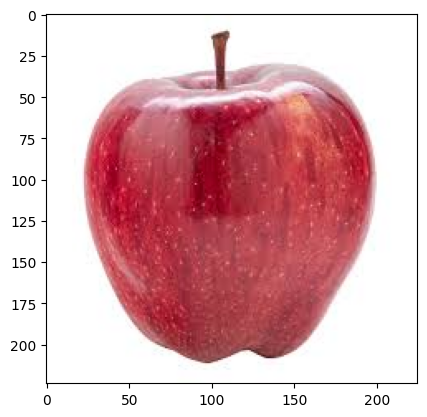

In [98]:
img = io.imread('images.jpeg')
plt.imshow(img)

[[63742 63742 63742 ... 63742 63742 63742]
 [63742 63742 63742 ... 63742 63742 63742]
 [63742 63742 63742 ... 63742 63742 63742]
 ...
 [63742 63742 63742 ... 63742 63742 63742]
 [63742 63742 63742 ... 63742 63742 63742]
 [63742 63742 63742 ... 63742 63742 63742]]


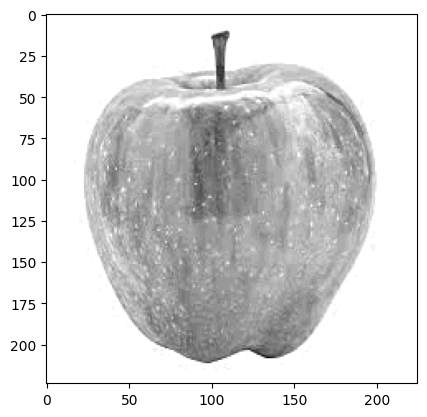

In [99]:
# gray_img = np.zeros(img.shape, dtype=np.uint16)
get_first_5_bits = lambda x: x // 0b1000
gray_img = get_first_5_bits(img[:, :, 0]) * 2048 + get_first_5_bits(img[:, :, 1]) * 64 + get_first_5_bits(img[:, :, 2]) * 2
# plt.imsave('gray_img.bmp', gray_img, cmap='gray')
plt.imshow(gray_img, cmap='gray')
print(gray_img)

In [100]:
import png
png.from_array(gray_img, 'L').save('gray_img.png')

In [101]:
print(gray_img.shape)

(224, 225)


In [102]:
bit_plane_16 = (gray_img // 0b100000000000000) & 1


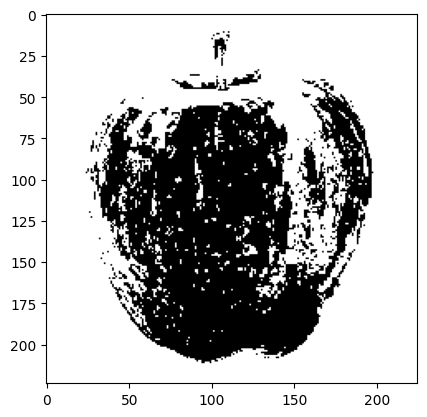

In [103]:
plt.imshow(bit_plane_16, cmap='gray')

In [104]:
random_mask = np.random.randint(0, 2, size=gray_img.shape, dtype=np.uint8)
print(random_mask)
print(random_mask.shape)

[[1 0 1 ... 0 0 1]
 [1 0 0 ... 1 0 0]
 [1 0 1 ... 1 1 0]
 ...
 [1 1 0 ... 1 1 0]
 [0 0 0 ... 0 0 1]
 [1 0 1 ... 1 1 0]]
(224, 225)


In [105]:
common_mask = bit_plane_16*2 + random_mask

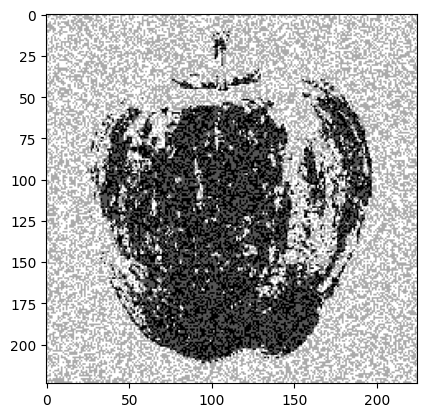

In [106]:
plt.imshow(common_mask, cmap='gray')

In [107]:
shares = {
    3: (np.array([[0,1],[0,1]]), np.array([[1,0],[1,0]])),
    2: (np.array([[1,0],[1,0]]), np.array([[0,1],[0,1]])),
    1: (np.array([[1,0],[1,0]]), np.array([[1,0],[1,0]])),
    0: (np.array([[0,1],[0,1]]), np.array([[0,1],[0,1]]))
}
def create_share(img: np.ndarray, share_no=0):
    share = np.zeros((img.shape[0] * 2, img.shape[1] * 2), dtype=np.uint16)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            share[i*2:i*2+2, j*2:j*2+2] = shares[img[i][j]][share_no]
    return share


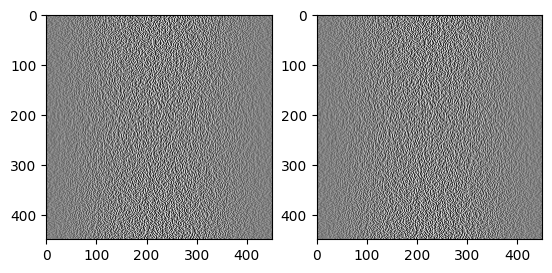

In [121]:
share1 = create_share(common_mask, 0)
share2 = create_share(common_mask, 1)
plt.subplot(1, 2, 1)
plt.imshow(share1, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(share2, cmap='gray')

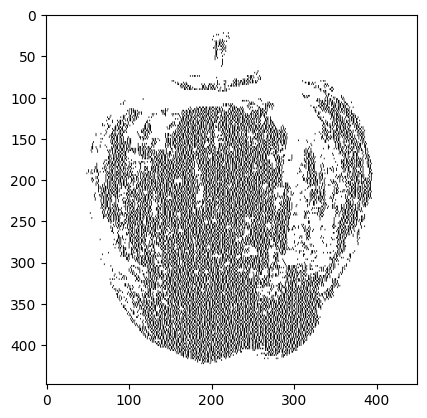

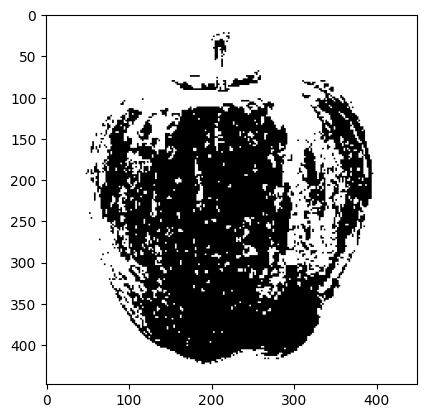

In [127]:
from skimage.measure import block_reduce

rebuilt = np.bitwise_or(share1, share2)
plt.imshow(rebuilt, cmap='gray')
plt.show()
denoised = block_reduce(rebuilt, (2, 2), np.sum)
denoised = np.kron(denoised, np.ones((2, 2)))
plt.imshow(denoised, cmap='gray')


In [111]:
share1 = np.squeeze